
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [57]:

import numpy as np
import matplotlib.pyplot as plt


In [58]:

# Implement StandardScaler manually , first read about it, how it works and then implement it
class StandardScalerManual:

    def __init__(self):
        self.mean = None
        self.std = None

    def fit(self, X):
        mu = np.mean(X, axis=0)
        sigma = np.std(X, axis=0)
        return mu, sigma

    def transform(self, X):
        mu, sigma = self.fit(X)
        X_scaled = (X - mu) / (sigma + 1e-8) # 1e-8 is added to avoid division by zero
        return X_scaled

    def fit_transform(self, X):
        return self.transform(X)


In [59]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegression:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
      self.lr = lr
      self.epochs = epochs
      self.l2_lambda = l2_lambda
      self.weights = None
      self.bias = None
      self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        regularization_term = (self.l2_lambda / n_samples) * self.weights
        self.loss_history = []
        for _ in range(self.epochs):
            # Forward Pass
            # Formula: y_pred = X . w + b
            y_pred = np.dot(X, self.weights) + self.bias
            mse = (1 / (2 * n_samples)) * np.sum((y_pred - y)**2)
            reg_loss = (self.l2_lambda / (2 * n_samples)) * np.sum(self.weights**2)
            self.loss_history.append(mse + reg_loss)
            error = y_pred - y

            # Backward Pass: Compute Gradients
            # Formula: dw = (1/m) * X.T . (y_pred - y)
            dw = (1 / n_samples) * np.dot(X.T, error)

            # Formula: db = (1/m) * sum(y_pred - y)
            db = (1 / n_samples) * np.sum(error)
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias



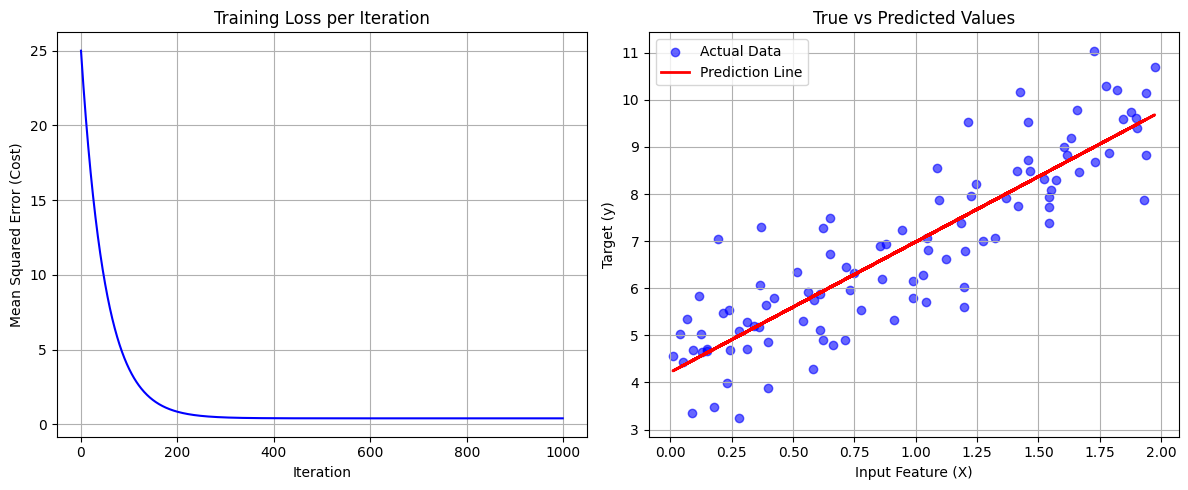

In [60]:
# Setup Data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X.flatten() + np.random.randn(100)

# Scale the data
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_scaled = (X - X_mean) / X_std

# Train Model
model = LinearRegression(lr=0.01, epochs=1000, l2_lambda=0.0)
model.fit(X_scaled, y)
predictions = model.predict(X_scaled)
plt.figure(figsize=(12, 5))

# Plot 1: Loss vs Iterations
plt.subplot(1, 2, 1)
plt.title('Training Loss per Iteration')
plt.plot(model.loss_history, color='blue')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (Cost)')
plt.grid(True)

# Plot 2: True Values vs Predicted Values
plt.subplot(1, 2, 2)
plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.6)
plt.plot(X, predictions, color='red', label='Prediction Line', linewidth=2)
plt.title('True vs Predicted Values')
plt.xlabel('Input Feature (X)')
plt.ylabel('Target (y)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [61]:

#Implement sigmoid function as told in the lectures
def sigmoid(z):
    return 1 / (1 + np.exp(-z))



Final Accuracy: 90.00%


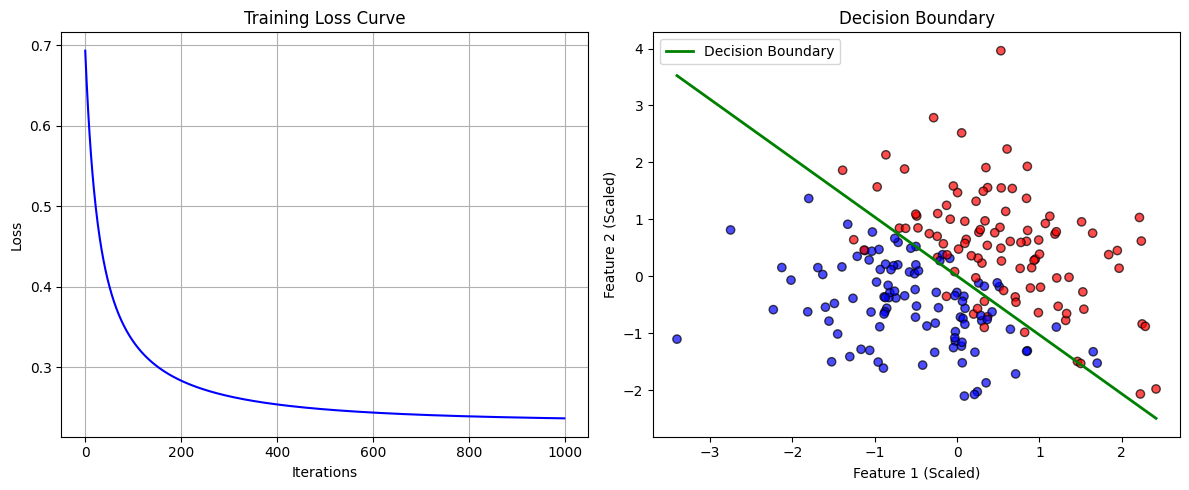

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# manualStandardScaler
class StandardScalerManual:

    def __init__(self):
        self.mean = None
        self.std = None

    def fit(self, X):
        mu = np.mean(X, axis=0)
        sigma = np.std(X, axis=0)
        return mu, sigma

    def transform(self, X):
        mu, sigma = self.fit(X)
        X_scaled = (X - mu) / (sigma + 1e-8) # 1e-8 is added to avoid division by zero
        return X_scaled

    def fit_transform(self, X):
        return self.transform(X)

# Fixed Logistic Regression
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.loss_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0
        self.loss_history = []
        y = y.reshape(-1, 1)

        for i in range(self.epochs):
            # Forward pass
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            # Compute loss
            epsilon = 1e-15
            bce_loss = - (1/n_samples) * np.sum(
                y * np.log(y_pred + epsilon) +
                (1 - y) * np.log(1 - y_pred + epsilon))

            l2_Penalty = (self.l2_lambda / (2 * n_samples)) * np.sum(np.square(self.weights))
            total_loss = bce_loss + l2_Penalty
            self.loss_history.append(total_loss)

            # Backward pass
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y)) + (self.l2_lambda / n_samples) * self.weights
            db = (1/n_samples) * np.sum(y_pred - y)

            # Update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

    def predict(self, X):
        threshold = 0.5
        y_pred_probs = self.predict_proba(X)
        return np.where(y_pred_probs >= threshold, 1, 0)

# Generate data
np.random.seed(42)
X_data = np.random.randn(200, 2)
y_data = (X_data[:, 0] + X_data[:, 1] + np.random.randn(200)*0.5 > 0).astype(int)

# Use StandardScaler
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X_data)

# Train LogisticRegression
model = LogisticRegressionManual(lr=0.1, epochs=1000, l2_lambda=0.1)
model.fit(X_scaled, y_data)

# Outputs
predictions = model.predict(X_scaled)
accuracy = np.mean(predictions.flatten() == y_data) * 100
print(f"\nFinal Accuracy: {accuracy:.2f}%")

# Plotting
plt.figure(figsize=(12, 5))

# Loss Curve
plt.subplot(1, 2, 1)
plt.plot(model.loss_history, color='blue')
plt.title('Training Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)

# Decision Boundary
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_data, cmap='bwr', edgecolor='k', alpha=0.7)
plt.title('Decision Boundary')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')

# boundary line
x1_vals = np.array([np.min(X_scaled[:, 0]), np.max(X_scaled[:, 0])])
w = model.weights.flatten()
b = model.bias
x2_vals = -(w[0] * x1_vals + b) / w[1]

plt.plot(x1_vals, x2_vals, color='green', linewidth=2, label='Decision Boundary')
plt.legend()

plt.tight_layout()
plt.show()


## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [63]:

# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT !
def kmeans_matrix(M, k, max_iters=100):
    '''
    Returns:
    assignment_table: same shape as M, contains cluster labels
    cookbook: dict -> cluster_id : list of (i, j) positions
    centroids: numpy array of centroid values
    '''
    data = M.flatten()
    n = len(data)
    centroids = np.random.choice(data, k, replace=False)
    for i in range(max_iters):
        distances = np.abs(data[:, np.newaxis] - centroids)
        nearest_centroids = np.argmin(distances, axis=1)
        new_centroids = np.zeros(k)
        for j in range(k):
          cluster_points = data[nearest_centroids == j]
          new_centroids[j] = np.mean(cluster_points)

        if np.all(np.abs( new_centroids-centroids)<1e-4):
          centroids = new_centroids
          labels = nearest_centroids
          break
        centroids = new_centroids
        labels = nearest_centroids

        assignment_table = labels.reshape(M.shape)
        cookbook = {i: [] for i in range(k)}
        rows, cols = M.shape
        for r in range(rows):
          for c in range(cols):
            cluster_index = assignment_table[r, c]
            cookbook[cluster_index].append((r, c))

    return assignment_table, cookbook, centroids

M = np.random.randint(0, 100, size=(5, 5))
k = 3

print("Input Matrix M:\n", M)
assignment_table, cookbook, centroids = kmeans_matrix(M, k)

# Display Results
print("\nCentroids\n")
print(centroids)

print("Assignment Table")
print(assignment_table)

print("Cookbook")
for key, value in cookbook.items():
    print(f"Cluster {key}: {value}")

Input Matrix M:
 [[46 67 75 44  1]
 [26 94 35 35 25]
 [42 26 68 19 10]
 [73 37  5 71 22]
 [46 89 45 11 89]]

Centroids

[70.8        27.94117647 90.66666667]
Assignment Table
[[1 0 0 1 1]
 [1 2 1 1 1]
 [1 1 0 1 1]
 [0 1 1 0 1]
 [1 2 1 1 2]]
Cookbook
Cluster 0: [(0, 1), (0, 2), (2, 2), (3, 0), (3, 3)]
Cluster 1: [(0, 0), (0, 3), (0, 4), (1, 0), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 3), (2, 4), (3, 1), (3, 2), (3, 4), (4, 0), (4, 2), (4, 3)]
Cluster 2: [(1, 1), (4, 1), (4, 4)]



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
